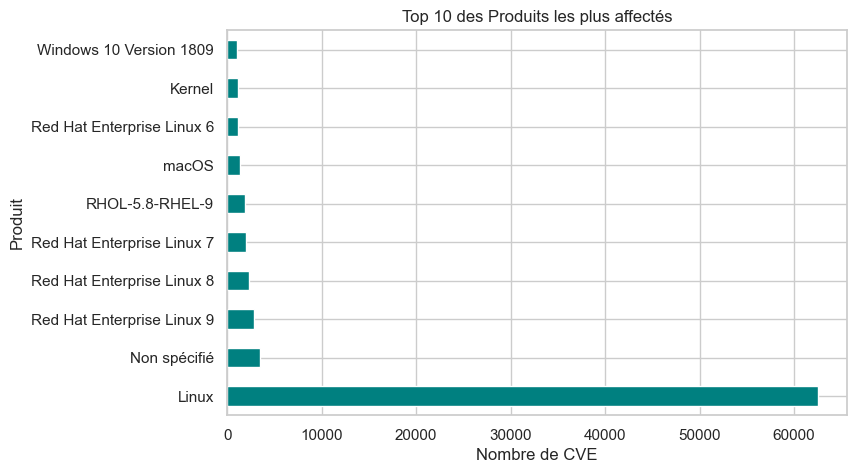

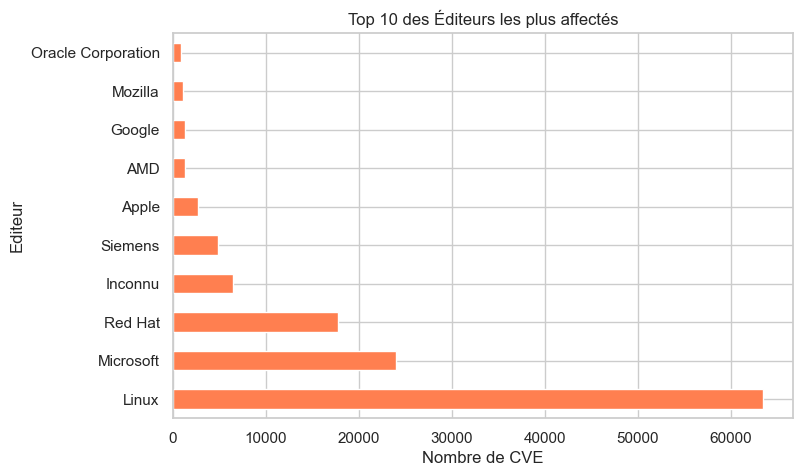

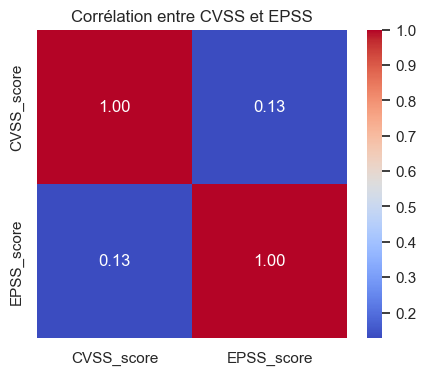

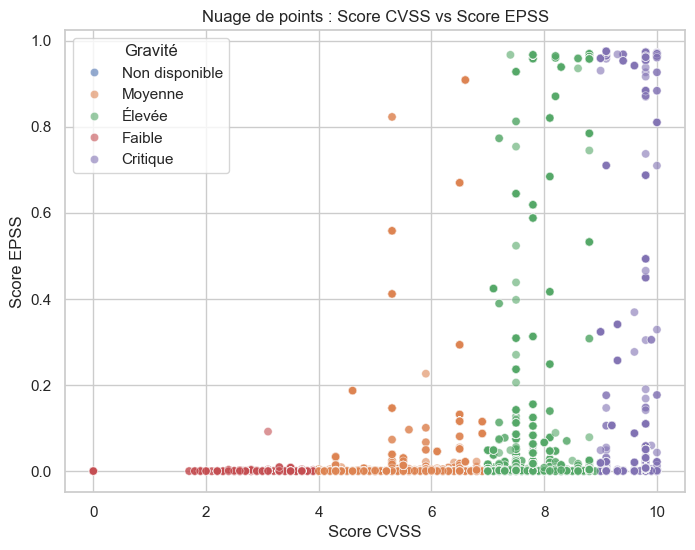

In [7]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Classement des produits et éditeurs les plus affectés
plt.figure(figsize=(8,5))
df['Produit'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 des Produits les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
df['Editeur'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 des Éditeurs les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

# Heatmap de corrélation CVSS / EPSS
plt.figure(figsize=(5,4))
sns.heatmap(df[['CVSS_score', 'EPSS_score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre CVSS et EPSS")
plt.show()

# Nuage de points CVSS vs EPSS
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CVSS_score', y='EPSS_score', hue='Base_Severity', alpha=0.6)
plt.title("Nuage de points : Score CVSS vs Score EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.legend(title='Gravité')
plt.show()

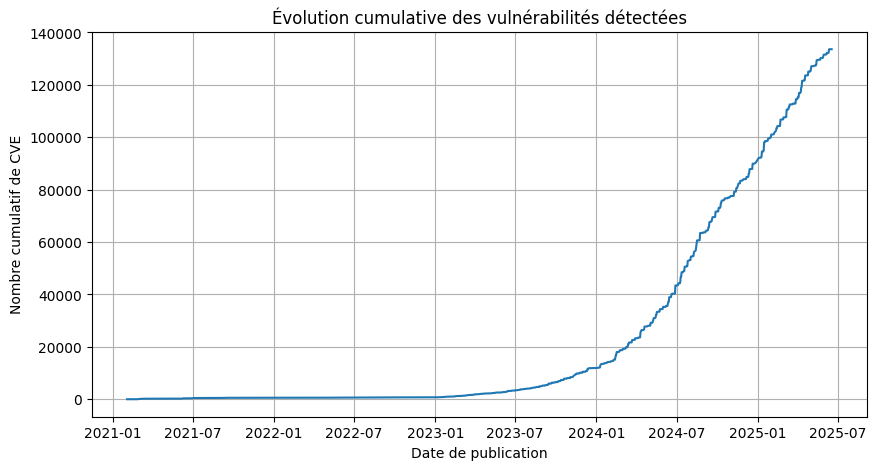

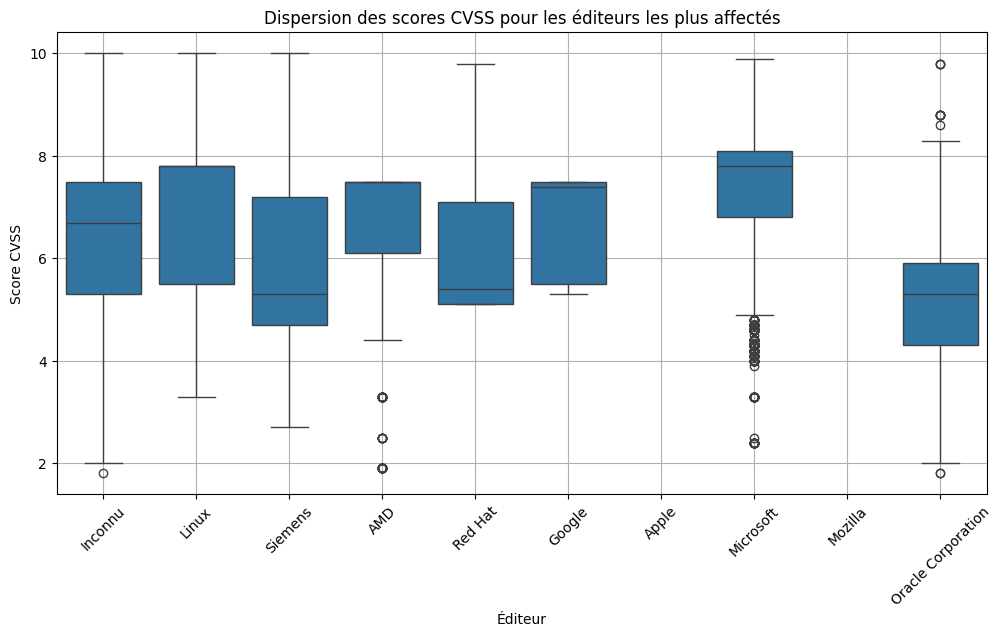

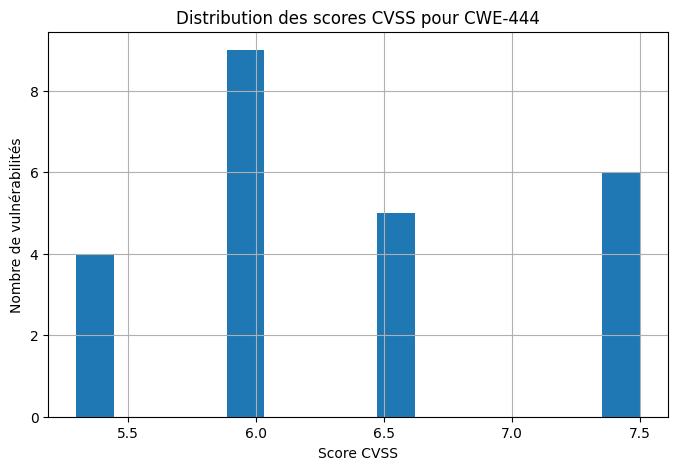

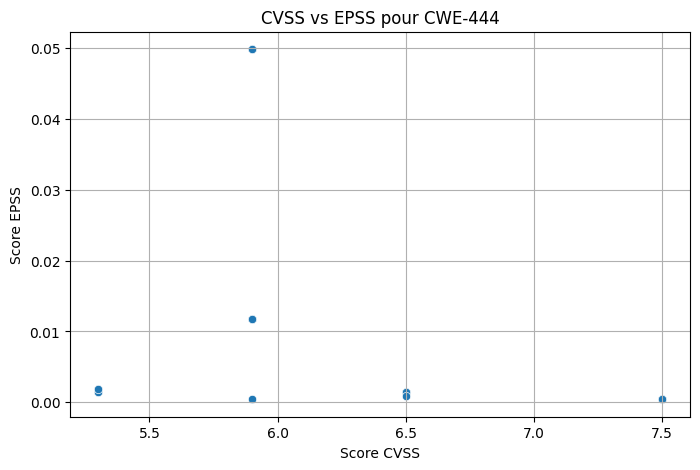

In [3]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Courbe cumulative des vulnérabilités dans le temps
plt.figure(figsize=(10,5))
df['Date_publication'].dropna().dt.date.value_counts().sort_index().cumsum().plot()
plt.title("Évolution cumulative des vulnérabilités détectées")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulatif de CVE")
plt.grid(True)
plt.show()

# Boxplot CVSS par éditeur (top 10)
top_editeurs = df['Editeur'].value_counts().head(10).index
df_top = df[df['Editeur'].isin(top_editeurs)]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='Editeur', y='CVSS_score')
plt.title("Dispersion des scores CVSS pour les éditeurs les plus affectés")
plt.xlabel("Éditeur")
plt.ylabel("Score CVSS")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualisation spécifique d'un CWE donné 
selected_cwe = "CWE-444"
df_cwe = df[df['CWE'] == selected_cwe]
plt.figure(figsize=(8,5))
df_cwe['CVSS_score'].hist(bins=15)
plt.title(f"Distribution des scores CVSS pour {selected_cwe}")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cwe, x='CVSS_score', y='EPSS_score')
plt.title(f"CVSS vs EPSS pour {selected_cwe}")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.show()

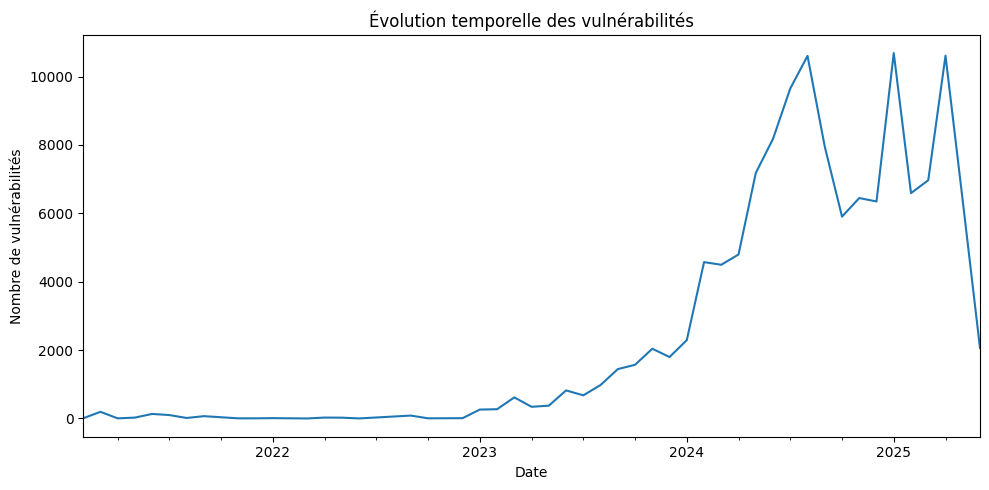

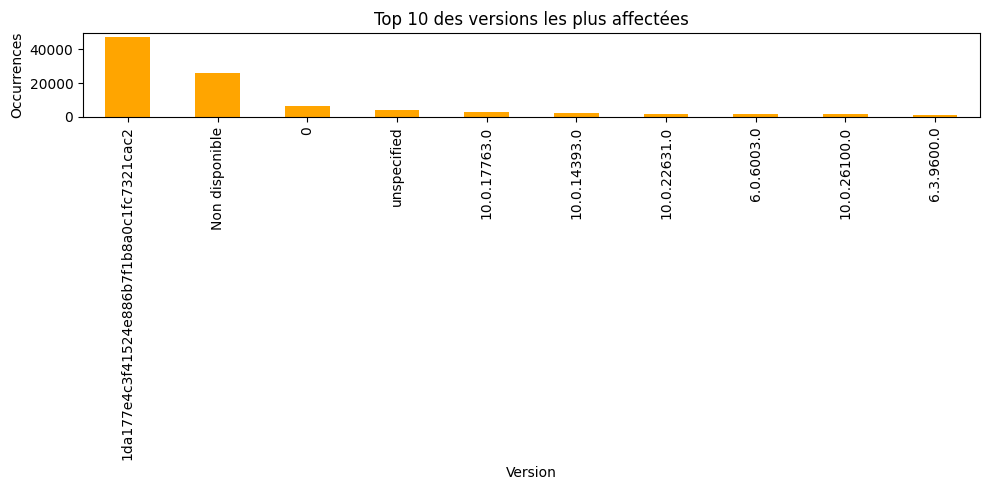

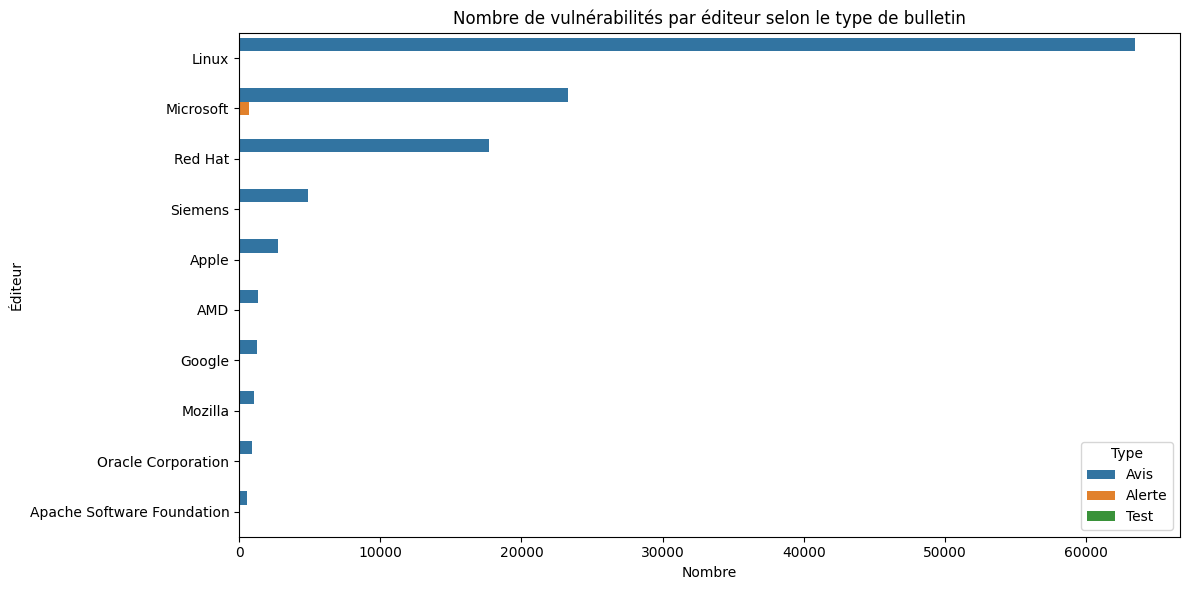

/var/folders/b2/1y2d3xq91y19zpkf8t6xbjzc0000gn/T/ipykernel_50403/4145460430.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CVSS_score'] = df_filtered['CVSS_score'].astype(float)


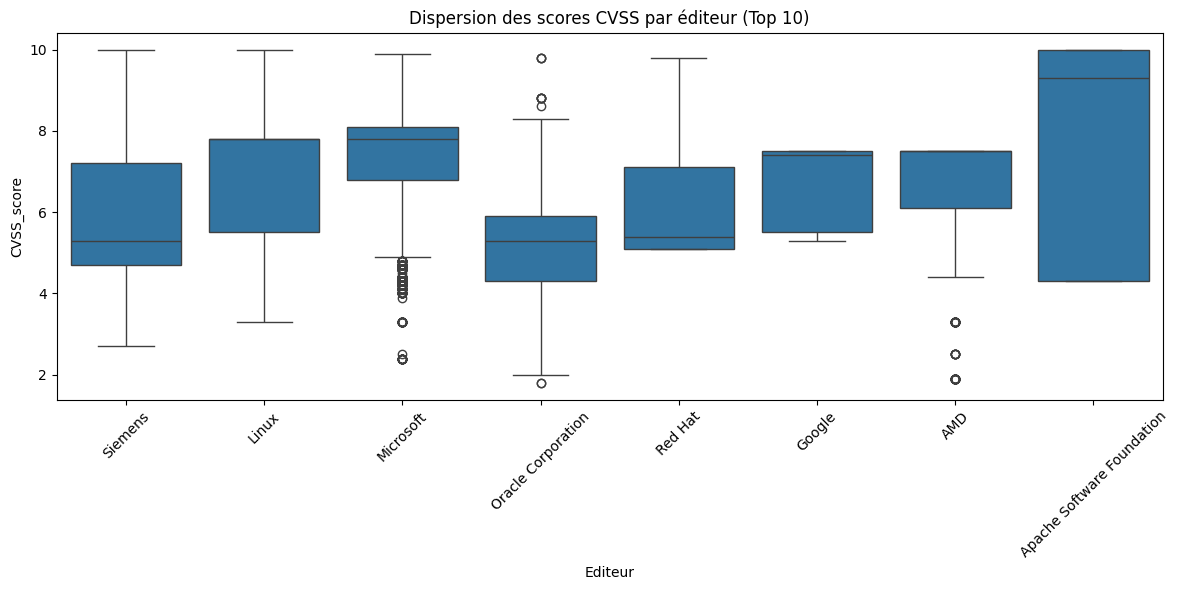

In [30]:
# Evolution temporelle du nombre de vuln\u00e9rabilit\u00e9s
plt.figure(figsize=(10,5))
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df.groupby(df['Date_publication'].dt.to_period('M')).size().plot()
plt.title("\u00c9volution temporelle des vuln\u00e9rabilit\u00e9s")
plt.xlabel("Date")
plt.ylabel("Nombre de vuln\u00e9rabilit\u00e9s")
plt.tight_layout()
plt.show()

# Versions les plus fr\u00e9quemment touch\u00e9es
plt.figure(figsize=(10,5))
versions = df['Versions_affectees'].dropna().str.split(', ')
flat_versions = [v.strip() for sublist in versions for v in sublist if v.strip() != ""]
pd.Series(flat_versions).value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 des versions les plus affect\u00e9es")
plt.xlabel("Version")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.show()

# Nombre de vuln\u00e9rabilit\u00e9s par \u00e9diteur et type de bulletin
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Editeur', hue='Type', order=df['Editeur'].value_counts().head(10).index)
plt.title("Nombre de vuln\u00e9rabilit\u00e9s par \u00e9diteur selon le type de bulletin")
plt.xlabel("Nombre")
plt.ylabel("\u00c9diteur")
plt.tight_layout()
plt.show()

# Dispersion des scores CVSS pour les \u00e9diteurs les plus affect\u00e9s
top_editors = df['Editeur'].value_counts().head(10).index
df_filtered = df[df['Editeur'].isin(top_editors) & df['CVSS_score'].notna()]
df_filtered['CVSS_score'] = df_filtered['CVSS_score'].astype(float)
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered, x='Editeur', y='CVSS_score')
plt.title("Dispersion des scores CVSS par \u00e9diteur (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

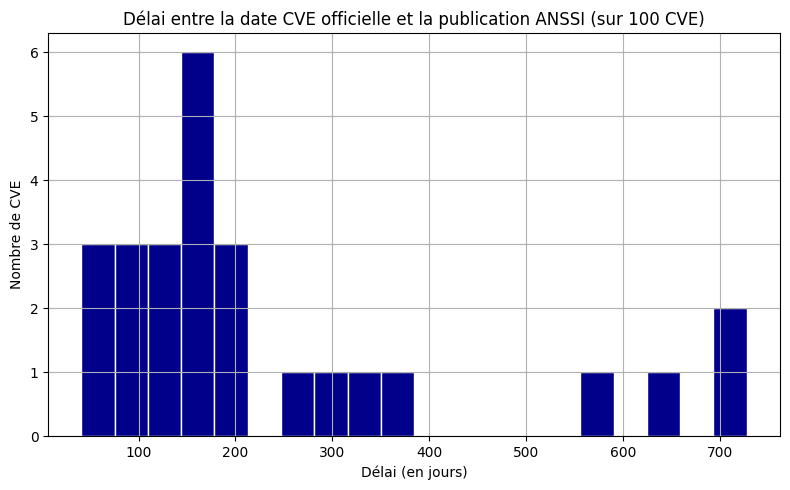

📊 Moyenne du délai : 238.81 jours
📈 Médiane : 154.5 jours
📉 Minimum : 41.0 jours
📈 Maximum : 728.0 jours


In [32]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt

# Charger les données ANSSI
df = pd.read_csv("DataFrame.csv")
df = df.dropna(subset=["CVE_ID", "Date_publication"])

# Forcer les dates ANSSI à être des datetime sans fuseau horaire
df["Date_publication"] = pd.to_datetime(df["Date_publication"], errors="coerce").dt.tz_localize(None)

# Fonction pour récupérer la date officielle de la CVE depuis l'API MITRE
def get_cve_date(cve_id):
    try:
        url = f"https://cveawg.mitre.org/api/cve/{cve_id}"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        return data.get("cveMetadata", {}).get("datePublished")
    except Exception as e:
        print(f"⚠️ Erreur récupération date pour {cve_id}: {e}")
        return None

# Sélectionner un échantillon pour test (éviter surcharge API)
sample = df.drop_duplicates(subset=["CVE_ID"]).head(100).copy()

# Obtenir les dates CVE
sample["Date_CVE"] = sample["CVE_ID"].apply(get_cve_date)
sample["Date_CVE"] = pd.to_datetime(sample["Date_CVE"], errors="coerce").dt.tz_localize(None)

# Calculer le délai en jours
sample["Delai_jours"] = (sample["Date_publication"] - sample["Date_CVE"]).dt.days
sample = sample.dropna(subset=["Delai_jours"])
sample = sample[sample["Delai_jours"] >= 0]

# Afficher l'histogramme des délais
plt.figure(figsize=(8,5))
sample["Delai_jours"].hist(bins=20, color="darkblue", edgecolor="white")
plt.title("Délai entre la date CVE officielle et la publication ANSSI (sur 100 CVE)")
plt.xlabel("Délai (en jours)")
plt.ylabel("Nombre de CVE")
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistiques
print("📊 Moyenne du délai :", round(sample["Delai_jours"].mean(), 2), "jours")
print("📈 Médiane :", sample["Delai_jours"].median(), "jours")
print("📉 Minimum :", sample["Delai_jours"].min(), "jours")
print("📈 Maximum :", sample["Delai_jours"].max(), "jours")

/var/folders/b2/1y2d3xq91y19zpkf8t6xbjzc0000gn/T/ipykernel_50403/4289694318.py:25: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/Users/ines/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


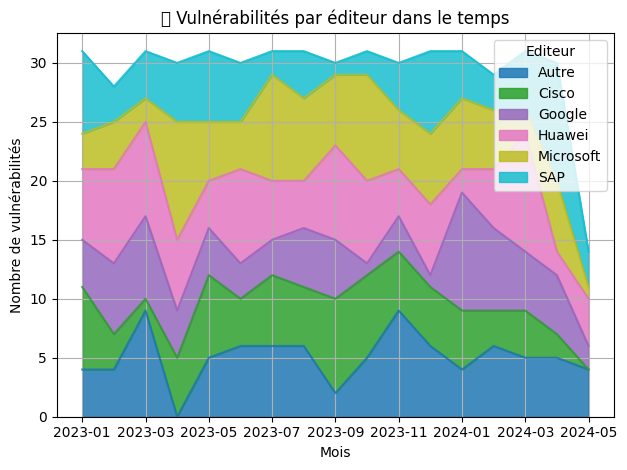

/var/folders/b2/1y2d3xq91y19zpkf8t6xbjzc0000gn/T/ipykernel_50403/4289694318.py:49: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ines/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


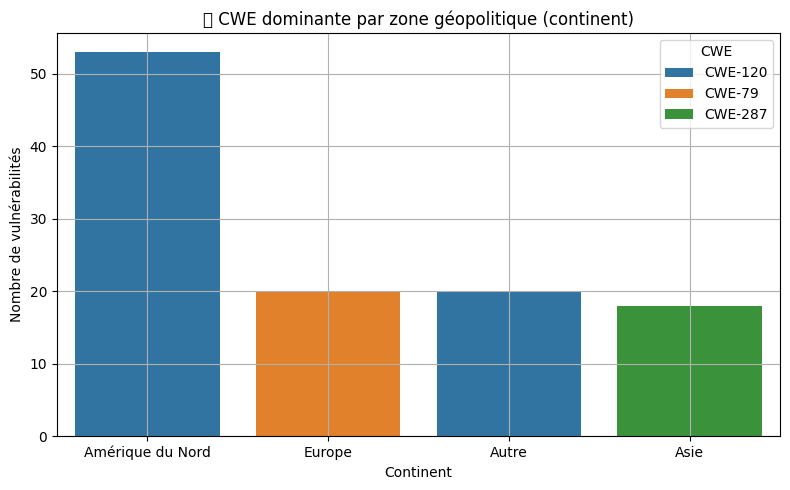

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Données fictives réalistes
np.random.seed(42)
n = 500
df = pd.DataFrame({
    "Date_publication": pd.date_range("2023-01-01", periods=n, freq="D"),
    "Editeur": np.random.choice(["Microsoft", "Google", "Cisco", "Huawei", "SAP", "Autre"], size=n),
    "CWE": np.random.choice(["CWE-79", "CWE-89", "CWE-287", "CWE-20", "CWE-120", "Non classé"], size=n)
})

# 🧱 Stacked Timeline
df["Mois"] = df["Date_publication"].dt.to_period("M").astype(str)
timeline = df.groupby(["Mois", "Editeur"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
timeline.plot(kind="area", stacked=True, colormap="tab10", alpha=0.85)
plt.title("🧱 Vulnérabilités par éditeur dans le temps")
plt.ylabel("Nombre de vulnérabilités")
plt.xlabel("Mois")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📍 Mapping éditeur → continent
editeur_continent = {
    "Microsoft": "Amérique du Nord",
    "Google": "Amérique du Nord",
    "Cisco": "Amérique du Nord",
    "Huawei": "Asie",
    "SAP": "Europe",
    "Autre": "Autre"
}
df["Continent"] = df["Editeur"].map(editeur_continent)

# CWE dominante par continent
cwe_counts = df.groupby(["Continent", "CWE"]).size().reset_index(name="count")
top_cwe_by_continent = cwe_counts.sort_values("count", ascending=False).drop_duplicates("Continent")

plt.figure(figsize=(8,5))
sns.barplot(data=top_cwe_by_continent, x="Continent", y="count", hue="CWE")
plt.title("📍 CWE dominante par zone géopolitique (continent)")
plt.ylabel("Nombre de vulnérabilités")
plt.xlabel("Continent")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#exploration des données 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du DataFrame
csv_path = "DataFrame.csv"
df = pd.read_csv(csv_path, encoding="utf-8")

# Affichage des informations générales
print("\u25B6 Informations generales sur le DataFrame")
df.info()

# Aper\u00e7u des premi\u00e8res lignes
print("\n\u25B6 Apercu des données")
print(df.head())

# Statistiques descriptives
print("\n\u25B6 Statistiques descriptives")
print(df.describe(include='all'))



▶ Informations generales sur le DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133613 entries, 0 to 133612
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_ANSSI            133613 non-null  object 
 1   Titre_ANSSI         133613 non-null  object 
 2   Type                133613 non-null  object 
 3   Date_publication    133613 non-null  object 
 4   CVE_ID              133613 non-null  object 
 5   CVSS_score          38563 non-null   float64
 6   Base_Severity       133613 non-null  object 
 7   CWE                 133613 non-null  object 
 8   CWE_description     130370 non-null  object 
 9   EPSS_score          133358 non-null  float64
 10  Lien_bulletin       133613 non-null  object 
 11  Description         133613 non-null  object 
 12  Editeur             127101 non-null  object 
 13  Produit             130087 non-null  object 
 14  Versions_affectees  130205 non-null  objec

In [26]:

# Comptage des données manquantes au sens large
def compter_manquants(col):
    return ((col.isna()) | (col == "") | (col == "Non disponible")).sum()

# Application à chaque colonne
manquants = df.apply(compter_manquants)

# Affichage des données manquantes
print("Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :\n")
print(manquants.sort_values(ascending=False))


Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :

CVSS_score            95050
Base_Severity         95050
CWE                   76929
CWE_description       67944
Versions_affectees    29349
Editeur                6512
Produit                3526
EPSS_score              255
ID_ANSSI                  0
Titre_ANSSI               0
Type                      0
Date_publication          0
CVE_ID                    0
Lien_bulletin             0
Description               0
dtype: int64
